<a href="https://colab.research.google.com/github/JuliaRapala/My-Python-Journey/blob/main/last_assignment_Julia_R%C4%85pa%C5%82a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import re

In [17]:
URL = "https://www.horoscope.com/us/tarot/tarot-daily-love.aspx"
response = requests.get(URL)
soup = BeautifulSoup(response.text, 'html.parser')

In [18]:
paragraphs = [p.get_text().strip() for p in soup.find_all('p')]
clean_paragraphs = []
for para in paragraphs:
  para = re.sub(r'\[[^\]]*\]', '', para)
  para = re.sub(r'\s+', ' ', para)
  clean_paragraphs.append(para.strip())

full_text = ' '.join(clean_paragraphs)

N = 8
print("\n".join(clean_paragraphs[:N]))

Get a forecast of your love life with this free Daily Love Tarot reading. Approach your romantic life with confidence.
The World card signifies a long journey coming to an end. If you've recently accomplished a lifelong goal such as purchasing a house, that's why this card appears. Take a...
JUN 29, 2025 - Undeniable power struggles and control issues dominate your conversations when Mercury in Leo opposes Pluto retrograde in Aquarius. Read full overview
© Copyright 2025 - Horoscope.com, Inc. - All rights reserved


In [22]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
tokens = word_tokenize(full_text)
tokens = [word.lower() for word in tokens if word.isalpha()]
pos_tags = pos_tag(tokens)
print(f"Total tokens (words): {len(tokens)}")

Total tokens (words): 76


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [24]:
from collections import Counter, defaultdict
categories = {
  'Nouns': ['NN', 'NNS', 'NNP', 'NNPS'],
  'Verbs': ['VB', 'VBG', 'VBD', 'VBZ', 'VBN', 'VBP'], # Added comma
  'Adjectives': ['JJ', 'JJS', 'JJR'], # Added comma
  'Adverbs': ['RB', 'RBS', 'RBR']
}

pos_counter = Counter()
category_words = defaultdict(list)
for word, tag in pos_tags:
  for category, tag_list in categories.items():
    if tag in tag_list:
      pos_counter[category] += 1
      category_words[category].append(word)

print("Word counts per category:", pos_counter)

Word counts per category: Counter({'Nouns': 23, 'Verbs': 17, 'Adjectives': 9, 'Adverbs': 1})


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

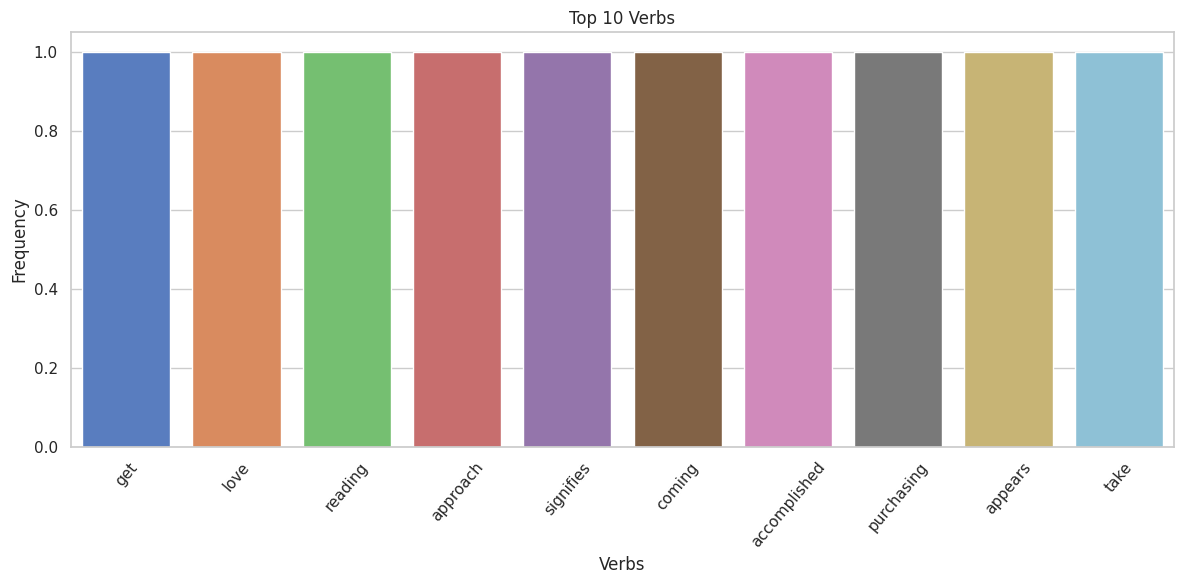

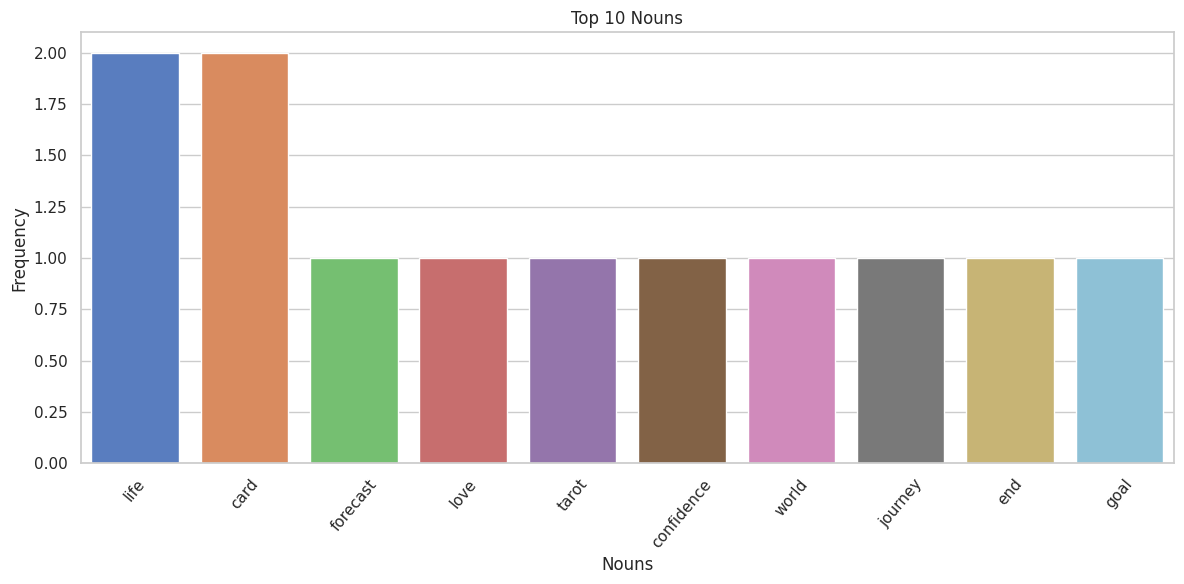

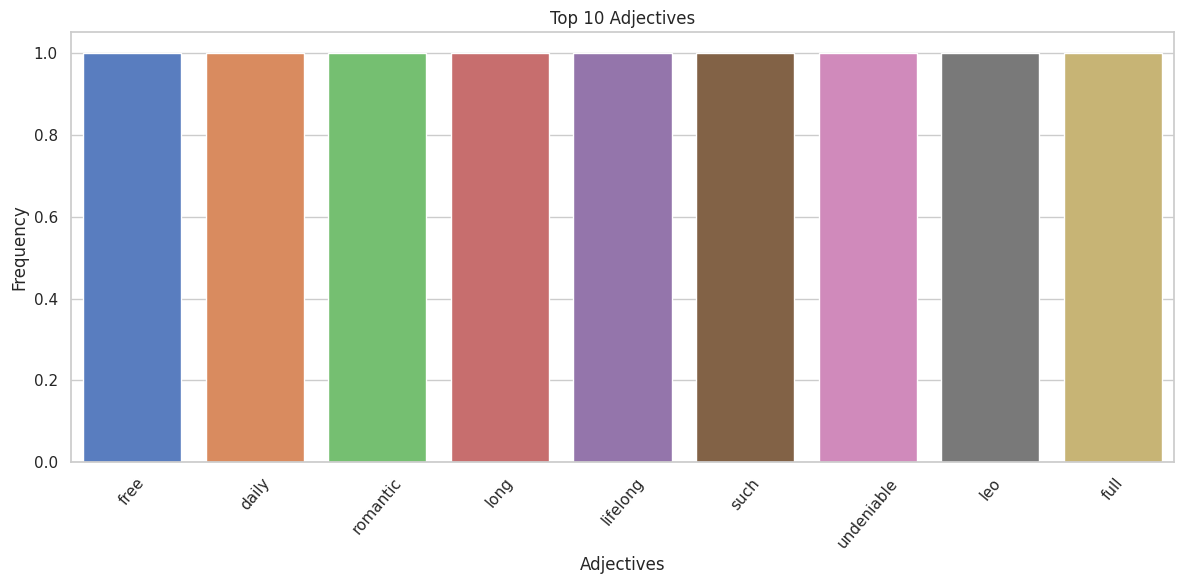

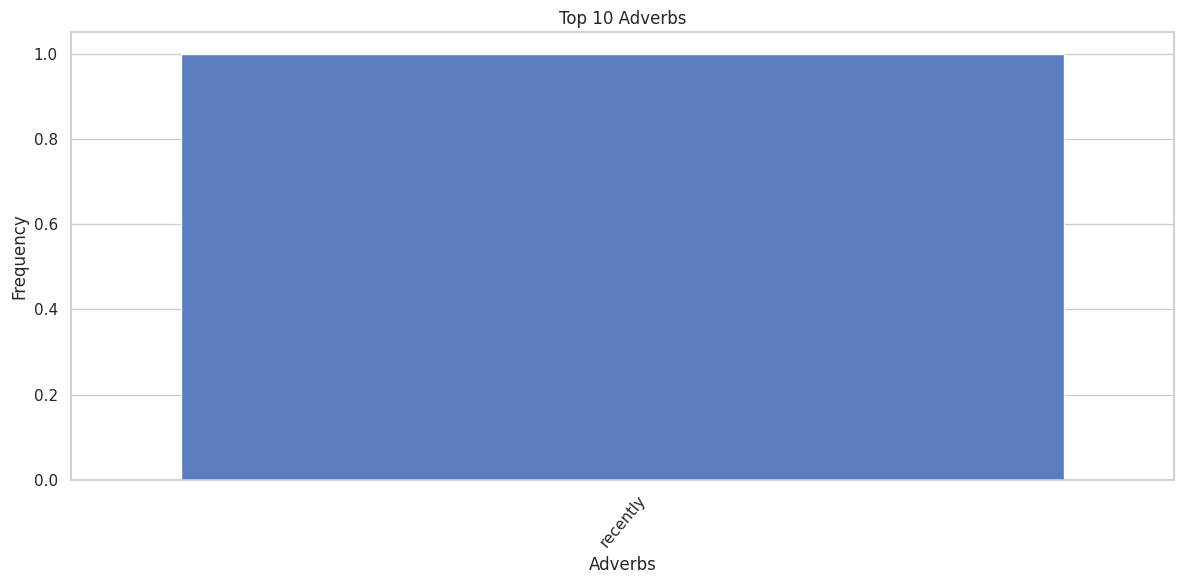

In [27]:
for cat, words in category_words.items():
  top_words = Counter(words).most_common(10)
  labels, counts = zip(*top_words)

  plt.figure(figsize=(12, 6))
  sns.barplot(x=list(labels), y=list(counts), palette="muted")
  plt.title(f"Top 10 {cat}")
  plt.ylabel("Frequency")
  plt.xlabel(f"{cat}")
  plt.xticks(rotation = 50)
  plt.tight_layout()
  plt.show()